# Data Understanding & Exploratory Data Analysis

## Dataset Overview

- **Total Customers:** 7,043
- **Features:** 20 (after removing customerID)
- **Target Variable:** Churn (Yes/No)

## Key Findings

### Target Distribution

The dataset shows a moderate class imbalance:
- **No Churn:** 5,174 customers (73.5%)
- **Yes Churn:** 1,869 customers (26.5%)

This 3:1 ratio confirms that accuracy alone would be a misleading metric. A naive model predicting "No Churn" for all customers would achieve 73.5% accuracy while providing zero business value.

### Data Quality Issues

**TotalCharges Data Type Problem:**
- Currently stored as object (string) instead of numeric
- Contains 11 records with empty space characters
- Requires conversion and handling of missing values in Phase 3

**Encoding Inconsistency:**
- SeniorCitizen is encoded as binary integers (0, 1)
- Other categorical variables use string labels (Yes/No, Male/Female)
- Standardization needed for model compatibility


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Dataset

The dataset is loaded and a preliminary inspection is performed to verify
that the data has been read correctly.


In [13]:
# Cell 2: Load Data
data = pd.read_csv("Teleco_customer_churn.csv")
print("Dataset shape:")
print(data.shape)
print("\nFirst few rows:")
print(data.head())

Dataset shape:
(7043, 21)

First few rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Strea

## Dataset Structure

Each row represents a single telecom customer.
Columns include service usage, billing information, contract details,
and the churn indicator.


In [14]:
# Cell 3: Basic Information
print("Column names:")
print(data.columns)
print("\nData types and info:")
print(data.info())

Column names:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   I

## Identifier and Target Variable

- `customerID` is an identifier and does not contain predictive information.
- `Churn` is the target variable indicating whether a customer left the service.


In [15]:
# Cell 4: Remove Identifier
if "customerID" in data.columns:
    data = data.drop(columns=["customerID"])
    print("customerID column removed")

customerID column removed


## Target Variable Distribution

Understanding whether churn is balanced or imbalanced
is critical before modeling.


In [16]:
# Cell 5: Target Distribution
data["Churn"].value_counts()
data["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Data Quality Check

This step identifies missing values and potential data issues
that must be addressed during preprocessing.


In [17]:
# Missing values per column
data.isnull().sum()

# Investigate TotalCharges formatting issue
data["TotalCharges"].dtype, (data["TotalCharges"] == " ").sum()


(dtype('O'), np.int64(11))

In [18]:
print("SeniorCitizen:", data["SeniorCitizen"].unique())
print("Gender:", data["gender"].unique())
print("Partner:", data["Partner"].unique())


SeniorCitizen: [0 1]
Gender: ['Female' 'Male']
Partner: ['Yes' 'No']


## Churn Distribution

Understanding the balance of the target variable is critical, as class imbalance
can significantly affect model evaluation and business decisions.


C:\Users\SHREYARTH\AppData\Local\Temp\ipykernel_17600\1145797197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x="Churn", palette="Set2")


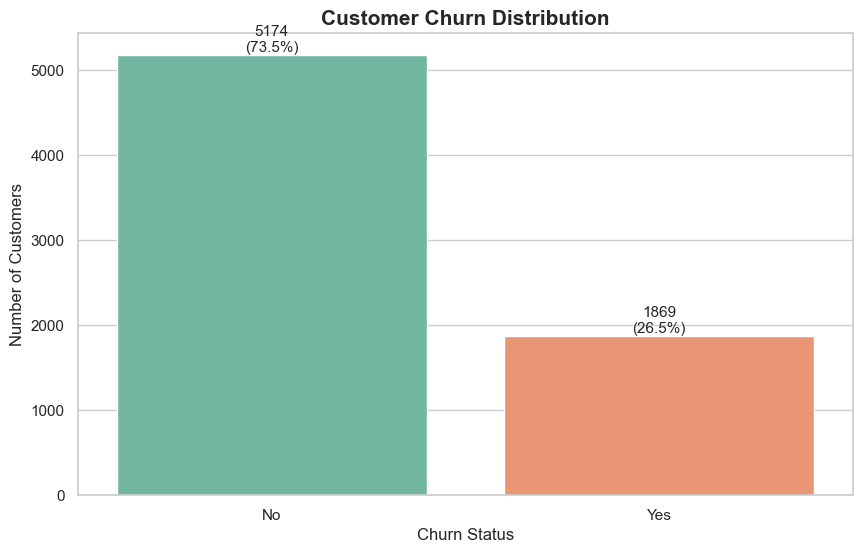

In [19]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


ax = sns.countplot(data=data, x="Churn", palette="Set2")

plt.title("Customer Churn Distribution", fontsize=15, fontweight="bold")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")

# Add count + percentage labels
total = len(data)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count / total:.1f}%"
    ax.annotate(f"{count}\n({percentage})",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.show()


## Churn vs Tenure

Tenure is a strong proxy for customer engagement and loyalty.
Short-tenure customers are often more likely to churn.


C:\Users\SHREYARTH\AppData\Local\Temp\ipykernel_17600\3474360830.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("TenureGroup")["Churn"]
C:\Users\SHREYARTH\AppData\Local\Temp\ipykernel_17600\3474360830.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


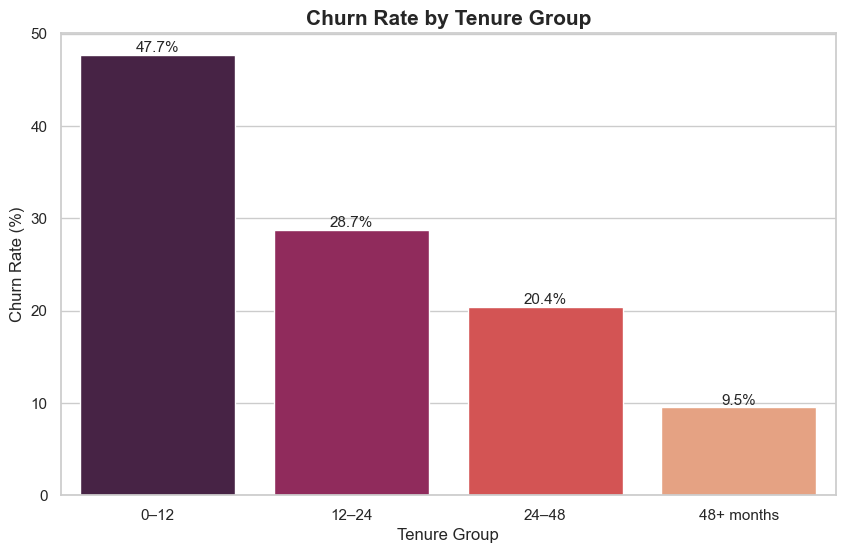

In [20]:
data["TenureGroup"] = pd.cut(
    data["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0–12", "12–24", "24–48", "48+ months"]
)

tenure_churn = (
    data.groupby("TenureGroup")["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .reset_index(name="ChurnRate")
)

ax = sns.barplot(
    data=tenure_churn,
    x="TenureGroup",
    y="ChurnRate",
    palette="rocket"
)

plt.title("Churn Rate by Tenure Group", fontsize=15, fontweight="bold")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.show()


## Monthly Charges vs Churn

Pricing sensitivity is a key driver of churn.
Comparing charge distributions helps reveal cost-related dissatisfaction.


C:\Users\SHREYARTH\AppData\Local\Temp\ipykernel_17600\37874278.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Churn", y="MonthlyCharges", palette="Set3")


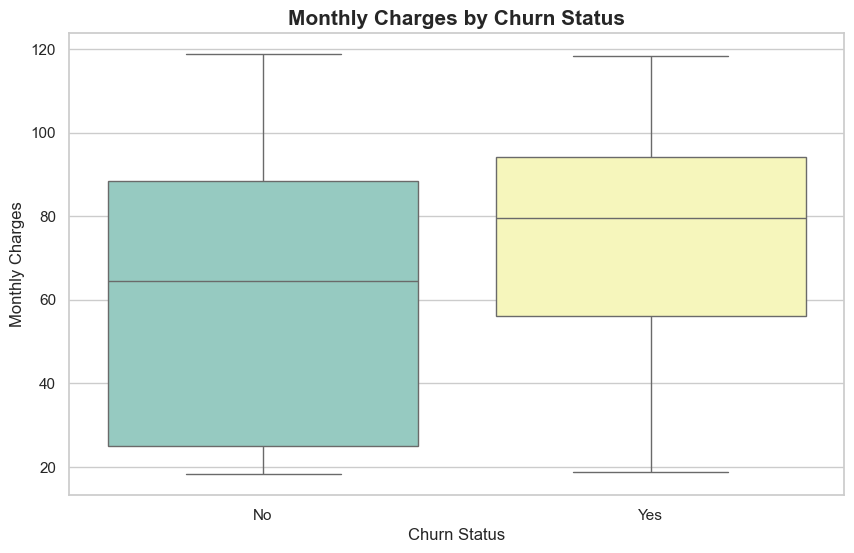

In [21]:
sns.boxplot(data=data, x="Churn", y="MonthlyCharges", palette="Set3")

plt.title("Monthly Charges by Churn Status", fontsize=15, fontweight="bold")
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges")

plt.show()


## Churn by Contract Type

Contract duration often introduces switching friction.
Month-to-month contracts typically exhibit higher churn.


C:\Users\SHREYARTH\AppData\Local\Temp\ipykernel_17600\3760826260.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


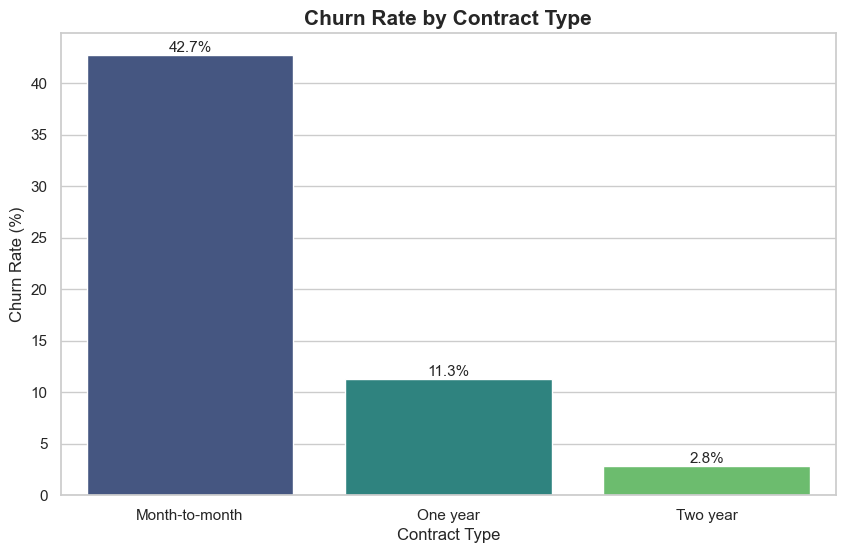

In [22]:
contract_churn = (
    data.groupby("Contract")["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .reset_index(name="ChurnRate")
    .sort_values("ChurnRate", ascending=False)
)

ax = sns.barplot(
    data=contract_churn,
    x="Contract",
    y="ChurnRate",
    palette="viridis"
)

plt.title("Churn Rate by Contract Type", fontsize=15, fontweight="bold")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.show()


## Churn by Internet Service Type

Different service offerings may correspond to different churn behaviors
due to performance, pricing, or customer expectations.


C:\Users\SHREYARTH\AppData\Local\Temp\ipykernel_17600\3747317559.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


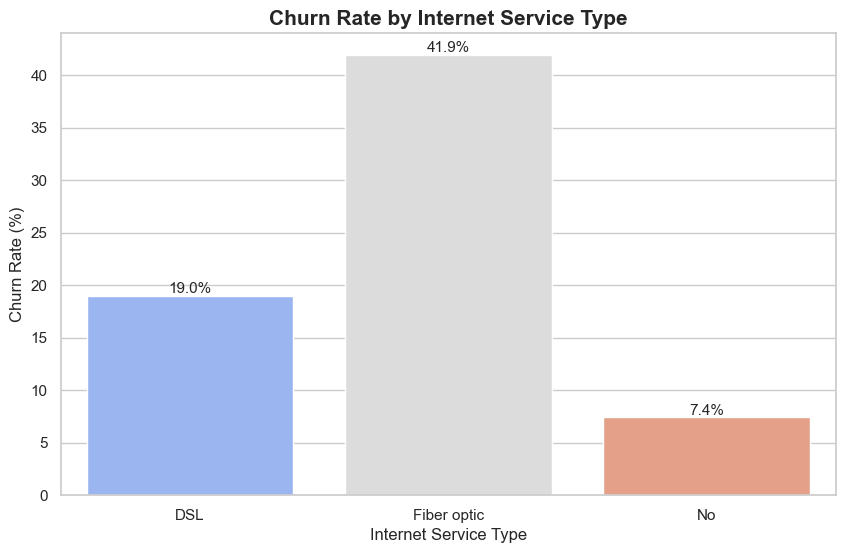

In [23]:
internet_churn = (
    data.groupby("InternetService")["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .reset_index(name="ChurnRate")
)

ax = sns.barplot(
    data=internet_churn,
    x="InternetService",
    y="ChurnRate",
    palette="coolwarm"
)

plt.title("Churn Rate by Internet Service Type", fontsize=15, fontweight="bold")
plt.xlabel("Internet Service Type")
plt.ylabel("Churn Rate (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.show()


## Summary

Key observations from EDA:

- Churn is **moderately imbalanced**, reinforcing the need for recall-focused metrics.
- Customers with **shorter tenure** show significantly higher churn.
- **Month-to-month contracts** are strongly associated with churn.
- Higher **monthly charges** correlate with increased churn risk.

These insights guide will help in feature engineering and model selection.


## Feature Engineering

### Target Variable Preparation

The target variable `Churn` was converted into a binary format to ensure
compatibility with machine learning models and evaluation metrics.


## Handling TotalCharges Missing Values
**Repalcing spaces with 0 and converting them to numeric**

In [ ]:

data['TotalCharges'] = data['TotalCharges'].replace(' ', '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

print("TotalCharges conversion complete")
print(f"Data type: {data['TotalCharges'].dtype}")
print(f"Missing values: {data['TotalCharges'].isnull().sum()}")

TotalCharges conversion complete
Data type: float64
Missing values: 0


## Preparing target variable
Converting 'Churn' to **Binary**

In [25]:

data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
print("Churn encoding:")
print(data['Churn'].value_counts())

Churn encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64


## Encoding Binary Variables 

Since many of the data is not machine readble we are using **Binary Encoding** to convert Yes/No Identifiers to 1/0

In [26]:
# Cell: Encode Binary Variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    print(f"\n{col} unique values: {data[col].unique()}")
    
# Map binary variables
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})

print("\nBinary encoding complete")



gender unique values: ['Female' 'Male']

Partner unique values: ['Yes' 'No']

Dependents unique values: ['No' 'Yes']

PhoneService unique values: ['No' 'Yes']

PaperlessBilling unique values: ['Yes' 'No']

Binary encoding complete


## One - Hot Encoding
Since there are many Identifiers with multiple variables we cannot use binary encoding to make them machine readable.
In which case will will use **One - Hot Encoding** to make them catergorical variables

In [27]:
# Cell: One-Hot Encode Categorical Variables
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Create dummy variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(f"Original shape: {data.shape}")
print(f"After encoding shape: {data_encoded.shape}")
print(f"\nNew columns created: {data_encoded.shape[1] - data.shape[1]}")

Original shape: (7043, 21)
After encoding shape: (7043, 32)

New columns created: 11


### Train-Test Split
- 80-20 split with stratification to maintain churn distribution
- Training set: [X] samples
- Test set: [X] samples
- Churn rate preserved in both sets (~26.5%)


In [30]:
# Cell: Train-Test Split
from sklearn.model_selection import train_test_split

# Separate features and target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nChurn distribution in test set:")
print(y_test.value_counts(normalize=True))

Training set size: (5634, 31)
Test set size: (1409, 31)

Churn distribution in training set:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Churn distribution in test set:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### Feature Scaling
As we are using models that are sensitive to feature scale (e.g., logistic regression), scaling is required.
- Applied StandardScaler to numerical features (tenure, MonthlyCharges, TotalCharges)
- Necessary for logistic regression to perform optimally

In [31]:
# Cell: Feature Scaling
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize scaler
scaler = StandardScaler()

# Scale numerical features
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

print("Numerical features scaled:")
print(data_encoded[numerical_cols].describe())

Numerical features scaled:
             tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.169057e-17   -1.866398e-17 -1.715068e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -1.005780e+00
25%   -9.516817e-01   -9.725399e-01 -8.299464e-01
50%   -1.372744e-01    1.857327e-01 -3.905282e-01
75%    9.214551e-01    8.338335e-01  6.648034e-01
max    1.613701e+00    1.794352e+00  2.825806e+00
